# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [3]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Sørland
Processing Record 2 of Set 1 | Vyshneve
Processing Record 3 of Set 1 | Barrow
Processing Record 4 of Set 1 | Chernyshevskiy
Processing Record 5 of Set 1 | Puerto Ayora
Processing Record 6 of Set 1 | Thompson
Processing Record 7 of Set 1 | Tautira
City not found. Skipping...
Processing Record 8 of Set 1 | Padang
Processing Record 9 of Set 1 | Cape Town
Processing Record 10 of Set 1 | Saint Paul Harbor
Processing Record 11 of Set 1 | Beringovskiy
Processing Record 12 of Set 1 | Tsumeb
Processing Record 13 of Set 1 | Egvekinot
Processing Record 14 of Set 1 | Lubao
Processing Record 15 of Set 1 | Departamento de Maldonado
Processing Record 16 of Set 1 | Almenara
Processing Record 17 of Set 1 | Hilo
Processing Record 18 of Set 1 | Jamestown
Processing Record 19 of Set 1 | Klaksvík
Processing Record 20 of Set 1 | Dikson
Processing Record 21 of Set 1 | Qaanaaq
Processing Record 22 of Set 1 | Port-G

Processing Record 34 of Set 4 | Kautokeino
Processing Record 35 of Set 4 | Ürümqi
Processing Record 36 of Set 4 | Rurrenabaque
Processing Record 37 of Set 4 | Sete Lagoas
Processing Record 38 of Set 4 | Mussomeli
Processing Record 39 of Set 4 | Malindi
Processing Record 40 of Set 4 | Kiryat Gat
Processing Record 41 of Set 4 | Kortkeros
Processing Record 42 of Set 4 | Oktyabr'skoye
Processing Record 43 of Set 4 | Wolfeboro
Processing Record 44 of Set 4 | Deputatsky
Processing Record 45 of Set 4 | Wilmington
Processing Record 46 of Set 4 | Vila Velha
Processing Record 47 of Set 4 | Phayao
Processing Record 48 of Set 4 | Maceió
Processing Record 49 of Set 4 | Hibbing
Processing Record 50 of Set 4 | Santa Marta
Processing Record 0 of Set 5 | Redlands
Processing Record 1 of Set 5 | Chokurdakh
Processing Record 2 of Set 5 | Safford
Processing Record 3 of Set 5 | Carroll
Processing Record 4 of Set 5 | Angoche
City not found. Skipping...
Processing Record 5 of Set 5 | Srednekolymsk
Processing 

Processing Record 16 of Set 8 | Camocim
Processing Record 17 of Set 8 | Lincoln
Processing Record 18 of Set 8 | Babu
Processing Record 19 of Set 8 | Morros
Processing Record 20 of Set 8 | Balikpapan
Processing Record 21 of Set 8 | Santa Lucía
Processing Record 22 of Set 8 | Dali
Processing Record 23 of Set 8 | Yulara
Processing Record 24 of Set 8 | Kushmurun
Processing Record 25 of Set 8 | Healdsburg
Processing Record 26 of Set 8 | Sirte
Processing Record 27 of Set 8 | Waldoboro
Processing Record 28 of Set 8 | Raudeberg
Processing Record 29 of Set 8 | Ossora
Processing Record 30 of Set 8 | Mosquera
Processing Record 31 of Set 8 | Leshan
Processing Record 32 of Set 8 | Sault Ste. Marie
Processing Record 33 of Set 8 | Qeshm
City not found. Skipping...
Processing Record 34 of Set 8 | Burla
Processing Record 35 of Set 8 | Arlit
Processing Record 36 of Set 8 | Mariehamn
Processing Record 37 of Set 8 | Shar
Processing Record 38 of Set 8 | Talnakh
Processing Record 39 of Set 8 | Boundiali
Cit

Processing Record 4 of Set 12 | Santa Clara
City not found. Skipping...
Processing Record 5 of Set 12 | Coyhaique
Processing Record 6 of Set 12 | Bay Roberts
Processing Record 7 of Set 12 | General Roca
Processing Record 8 of Set 12 | Tiznit Province
Processing Record 9 of Set 12 | Dingle
Processing Record 10 of Set 12 | Beyneu
Processing Record 11 of Set 12 | Lichinga
Processing Record 12 of Set 12 | Korla
Processing Record 13 of Set 12 | Visby
Processing Record 14 of Set 12 | Atasū
Processing Record 15 of Set 12 | Bellinge
Processing Record 16 of Set 12 | Saltpond
Processing Record 17 of Set 12 | Altenburg
Processing Record 18 of Set 12 | Lundazi
Processing Record 19 of Set 12 | Lázaro Cárdenas
Processing Record 20 of Set 12 | Shahe
Processing Record 21 of Set 12 | Diego de Almagro
Processing Record 22 of Set 12 | Taoudenni
Processing Record 23 of Set 12 | Bahía Blanca
Processing Record 24 of Set 12 | Leshukonskoye
Processing Record 25 of Set 12 | Muaná
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=False, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sørland,67.6670,12.6934,35.91,82,100,27.04,NO,1610218781
1,Vyshneve,50.3891,30.3705,33.01,93,90,11.18,UA,1610218782
2,Barrow,71.2906,-156.7887,-2.20,78,90,8.05,US,1610218541
3,Chernyshevskiy,63.0128,112.4714,-26.90,85,24,3.65,RU,1610218785
4,Puerto Ayora,-0.7393,-90.3518,84.20,58,0,17.27,EC,1610218786


In [5]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,19.064050,16.582250,50.759710,71.703072,54.883959,8.072423,1.610219e+09
std,33.037003,87.785911,33.258013,20.863182,40.246465,5.640019,2.173951e+02
min,-54.800000,-179.166700,-47.200000,10.000000,0.000000,0.130000,1.610219e+09
25%,-7.444500,-60.241600,30.990000,59.000000,7.250000,3.860000,1.610219e+09
50%,21.219300,21.292150,63.475000,77.000000,73.000000,6.440000,1.610219e+09
75%,46.357125,88.327075,77.707500,87.000000,95.750000,11.500000,1.610219e+09
max,78.218600,179.316700,101.280000,100.000000,100.000000,29.930000,1.610220e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_check = city_weather.loc[city_weather["Humidity"] > 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

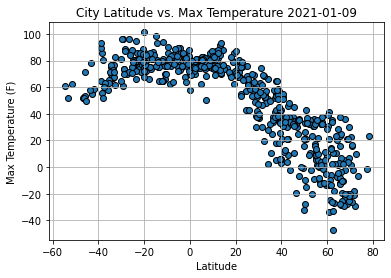

In [11]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

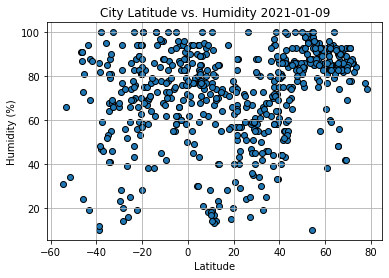

In [12]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

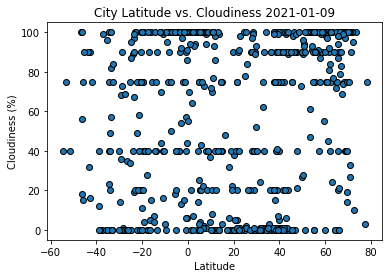

In [13]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

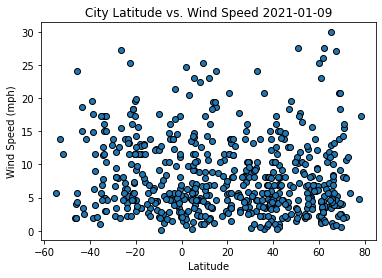

In [14]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [15]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.880859748755138


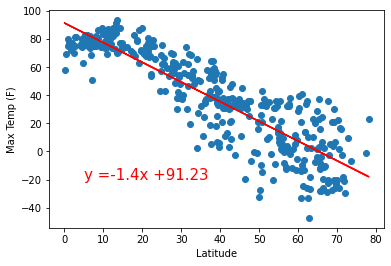

In [16]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

This model shows the linear regression of max temp vs. latitude in the northern hemisphere.  It shows that there is a negative correlation between latitude and temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.47915076492331676


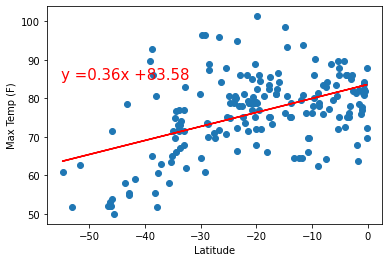

In [17]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

This linear regression is modeling the relationship between latitude and max temp in the southern hemisphere.  It shows that there is a positive correlation. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3687846557490754


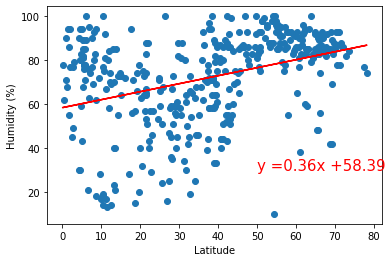

In [18]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2533841237873211


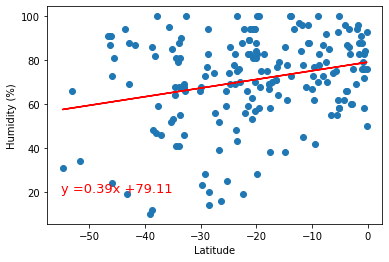

In [19]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29868725157441545


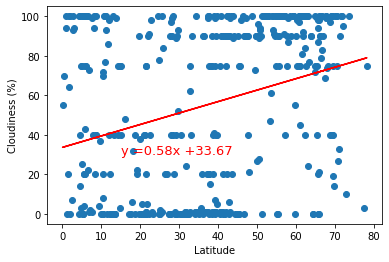

In [20]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2055966121751287


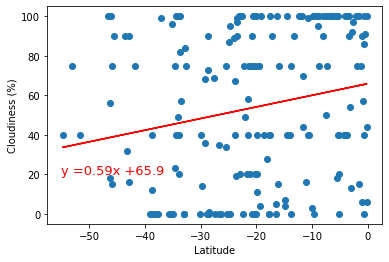

In [21]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004169011798986988


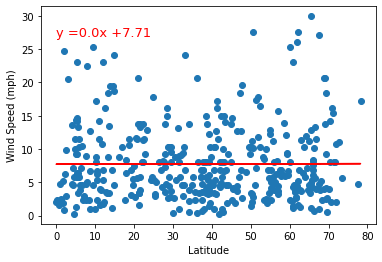

In [22]:
x = north["Lat"]
y = north["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(0, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11011173543268883


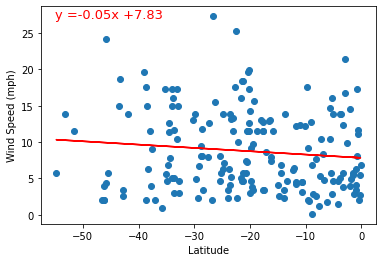

In [23]:
x = south["Lat"]
y = south["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()